In [55]:
"""
- 원래는 matplotlib의 animation을 이용해서 비디오를 만들고 그려보려고 했으나, 몇가지이유로 매우 어려워짐
    - 우선, matplotlib의 animation이 jupyter notebook과 매우 안 붙음. 쥬피터에서 animation이 매우 안 굴러감
    - 몇몇 코드의 경우, 굴러가게 만들었는데, 그 다음에도 비디오 파일, gif로 저장하는 것이 매우 어려움. 
        - writer를 설치해야 하는데, ffmpeg를 설치했는데도 설치안되었다고 한다거나.
        - imagenick인가 설치하라는데, 그것도 설치가 pip, brew 등으로 되지 않음.
- 다른 길이 있나 싶어서, 찾아보다가. 이미지를 numpy.array로 가지고 있다면 이걸 사용해서 비디오로 만들어주는 케이스를 발견함
    - matplotlib의 figure를 np.array로 변환하는 것은 크게 어렵지 않을 것 같고
    - 이미지를 비디오로 만든다면, 이 경우가 마크다운, 쥬피터 노트북 등에서 확인하는 것이 더 쉬울 것처럼 보임. 

"""

'\n- 원래는 matplotlib의 animation을 이용해서 비디오를 만들고 그려보려고 했으나, 몇가지이유로 매우 어려워짐\n    - 우선, matplotlib의 animation이 jupyter notebook과 매우 안 붙음. 쥬피터에서 animation이 매우 안 굴러감\n    - 몇몇 코드의 경우, 굴러가게 만들었는데, 그 다음에도 비디오 파일, gif로 저장하는 것이 매우 어려움. \n        - writer를 설치해야 하는데, ffmpeg를 설치했는데도 설치안되었다고 한다거나.\n        - imagenick인가 설치하라는데, 그것도 설치가 pip, brew 등으로 되지 않음.\n- 다른 길이 있나 싶어서, 찾아보다가. 이미지를 numpy.array로 가지고 있다면 이걸 사용해서 비디오로 만들어주는 케이스를 발견함\n    - matplotlib의 figure를 np.array로 변환하는 것은 크게 어렵지 않을 것 같고\n    - 이미지를 비디오로 만든다면, 이 경우가 마크다운, 쥬피터 노트북 등에서 확인하는 것이 더 쉬울 것처럼 보임. \n\n'

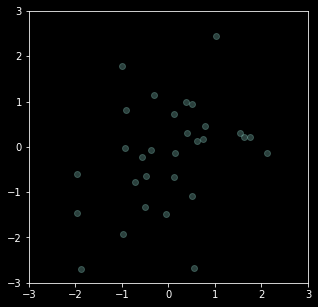

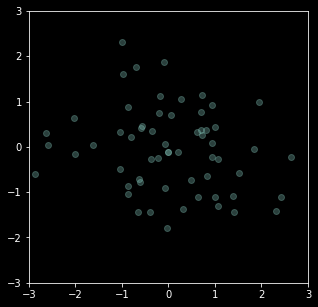

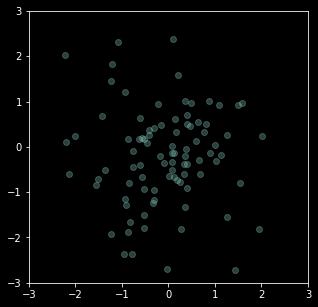

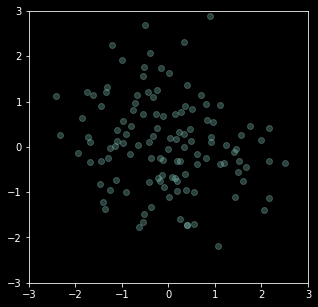

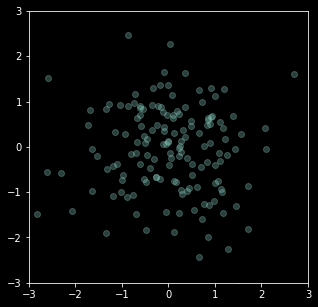

In [75]:
# figure to np.array
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.style.use('dark_background')

for i in range(0, 5):
    x = np.random.normal(0, 1, ((i+1)*30))
    y = np.random.normal(0, 1, ((i+1)*30))
    f = plt.figure(figsize=(5, 5))
    plt.scatter(x, y, alpha=0.3)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    #plt.axis('off')
    file_name = '../../assets/images/markdown_img/180628_1422_test_img_{}.jpg'.format(i)
    plt.savefig(file_name)
    
#images1And2 = Image.blend(image1, image2, 0.5)

In [82]:
img1 = Image.open("../../assets/images/markdown_img/180628_1422_test_img_{}.jpg".format(1))
img2 = Image.open("../../assets/images/markdown_img/180628_1422_test_img_{}.jpg".format(2))
img3 = Image.open("../../assets/images/markdown_img/180628_1422_test_img_{}.jpg".format(2))
height, width, layers =  np.array(img1).shape
print(np.array(img1).shape)

video = cv2.VideoWriter("../../assets/images/markdown_img/180628_test_video.avi", # Filename
                        cv2.VideoWriter_fourcc('H','2','6','4'), # codec selection 
                        10, # frames per second 
                        (width,height) # The width and height come from the stats of image1
                        )

for i in range(0,30):
    images1And2 = Image.blend(img1, img2, i/30.0)
    # Conversion from PIL to OpenCV from: http://blog.extramaster.net/2015/07/python-converting-from-pil-to-opencv-2.html
    video.write(cv2.cvtColor(np.array(images1And2), cv2.COLOR_RGB2BGR))

# And back from image2 to image1...
for i in range(0,30):
    images2and1 = Image.blend(img2, img1, i/30.0)
    video.write(cv2.cvtColor(np.array(images2and1), cv2.COLOR_RGB2BGR))
video.release()

(360, 360, 3)


In [83]:
from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="../../assets/images/markdown_img/180628_test_video.avi" type="video/mp4">
</video>
""")

In [80]:
import io
import base64
from IPython.display import HTML
video = io.open('../../assets/images/markdown_img/180628_test_video_tr.mov', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))